In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as ss
#t= np.arange(-10*np.pi, 10*np.pi,np.pi/1000)

Fs = 5000
T = 1/Fs
L=1500
t1 = np.arange(0,L-1)*T
S =.7*np.sin(2*np.pi*50*t1)+t1*30+np.sin(2*np.pi*1200*t1)

f = Fs*np.arange(0,(L/2))/L
X = S #2*np.random.rand(int(t1.shape[0]))
def one_sided_fft(X,L,f):
    Y= np.fft.fft(X)
    P2 = abs(Y/L);
    P1 = P2[1:int(L/2)+1];
    P1[2:-2] = 2*P1[2:-2];
    return P1
P1 = one_sided_fft(S,L,f)

#t= np.linspace(-0, 10*np.pi,8192)
#y=np.exp(-np.pi*t)*np.cos(40*np.pi*t)
#ffty=np.real(np.fft.rfft(y))
#freq=np.fft.rfftfreq(t.shape[-1])
#shiftfreq=np.fft.fftshift(freq)
plt.plot(1000*t1[0:int(np.ceil(Fs/10))],X[0:int(np.ceil(Fs/10))])


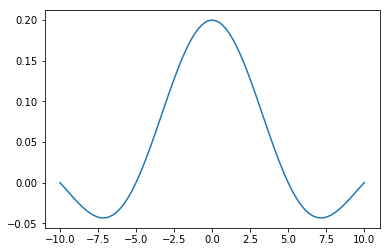

In [4]:
def gaussian(x, mu, sig): #x defines dimension, mu x-offset, sig the stdev
    
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

def low_pass_sinc(x,B): #x defines dimension, B is the frequency
    
    return 2*B*np.sinc(2*B*x)

s=10
r=100
space=np.linspace(-s, s, r)
C=low_pass_sinc(space, 1000 )

#C= gaussian(space, 0, s/10)
#C=C/sum(C)
plt.plot(space,C)
cf=Fs*np.arange(0,(space.shape[0]/2))/space.shape[0]
Cfft=one_sided_fft(C,int(space.shape[0]),cf)
W=np.convolve(C,X, mode='same')
Wfft=one_sided_fft(W,L,f)

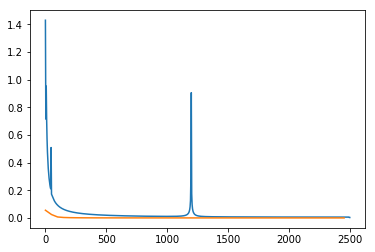

In [5]:
plt.plot(f,P1)
plt.plot(cf[0:50],Cfft[0:50])

In [7]:
st=np.std(ffty)
maxima=ffty[ffty>3*st]
minima=ffty[ffty<-3*st]
[maxima,minima]

[array([ 66.02685163]), array([-33.30987846])]

In [6]:
b=np.empty(maxima.shape[0])
c=np.empty(minima.shape[0])

for i in np.arange(maxima.shape[0]):
    
    b[np.int(i)]=np.nonzero(ffty==maxima[np.int(i)])[0][0]
    #print('Maximum values of ' + str(freq[b[np.int(i)]]))
    
for i in np.arange(minima.shape[0]):
    
    c[i]=np.nonzero(ffty==minima[i])[0][0]
    #print('Minimum values of ' + str(freq[c[i]]))

    

NameError: name 'maxima' is not defined

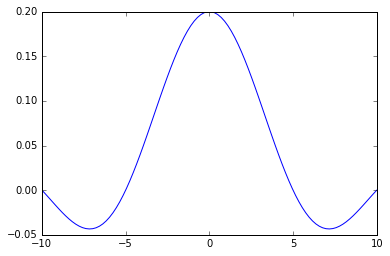

In [7]:
C = np.empty(int(Fs/100))
C_shape=int(C.shape[0])
C_center=int(C_shape/2)
C_radius=int(C_shape/10)
C[C_center-C_radius:C_center+C_radius] = [-.1,.8,-.1]
C

ValueError: cannot copy sequence with size 3 to array axis with dimension 10

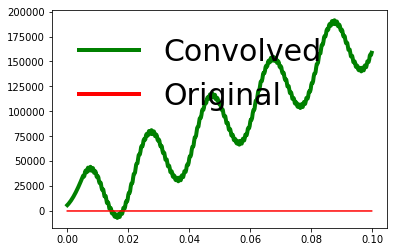

In [8]:
W=np.convolve(C,X, mode='same')
plt.plot(t1[0:int(np.ceil(Fs/10))],W[0:int(np.ceil(Fs/10))],'g-', linewidth=4, label="Convolved") 
plt.plot(t1[0:int(np.ceil(Fs/10))],X[0:int(np.ceil(Fs/10))],'r-', label="Original")


leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


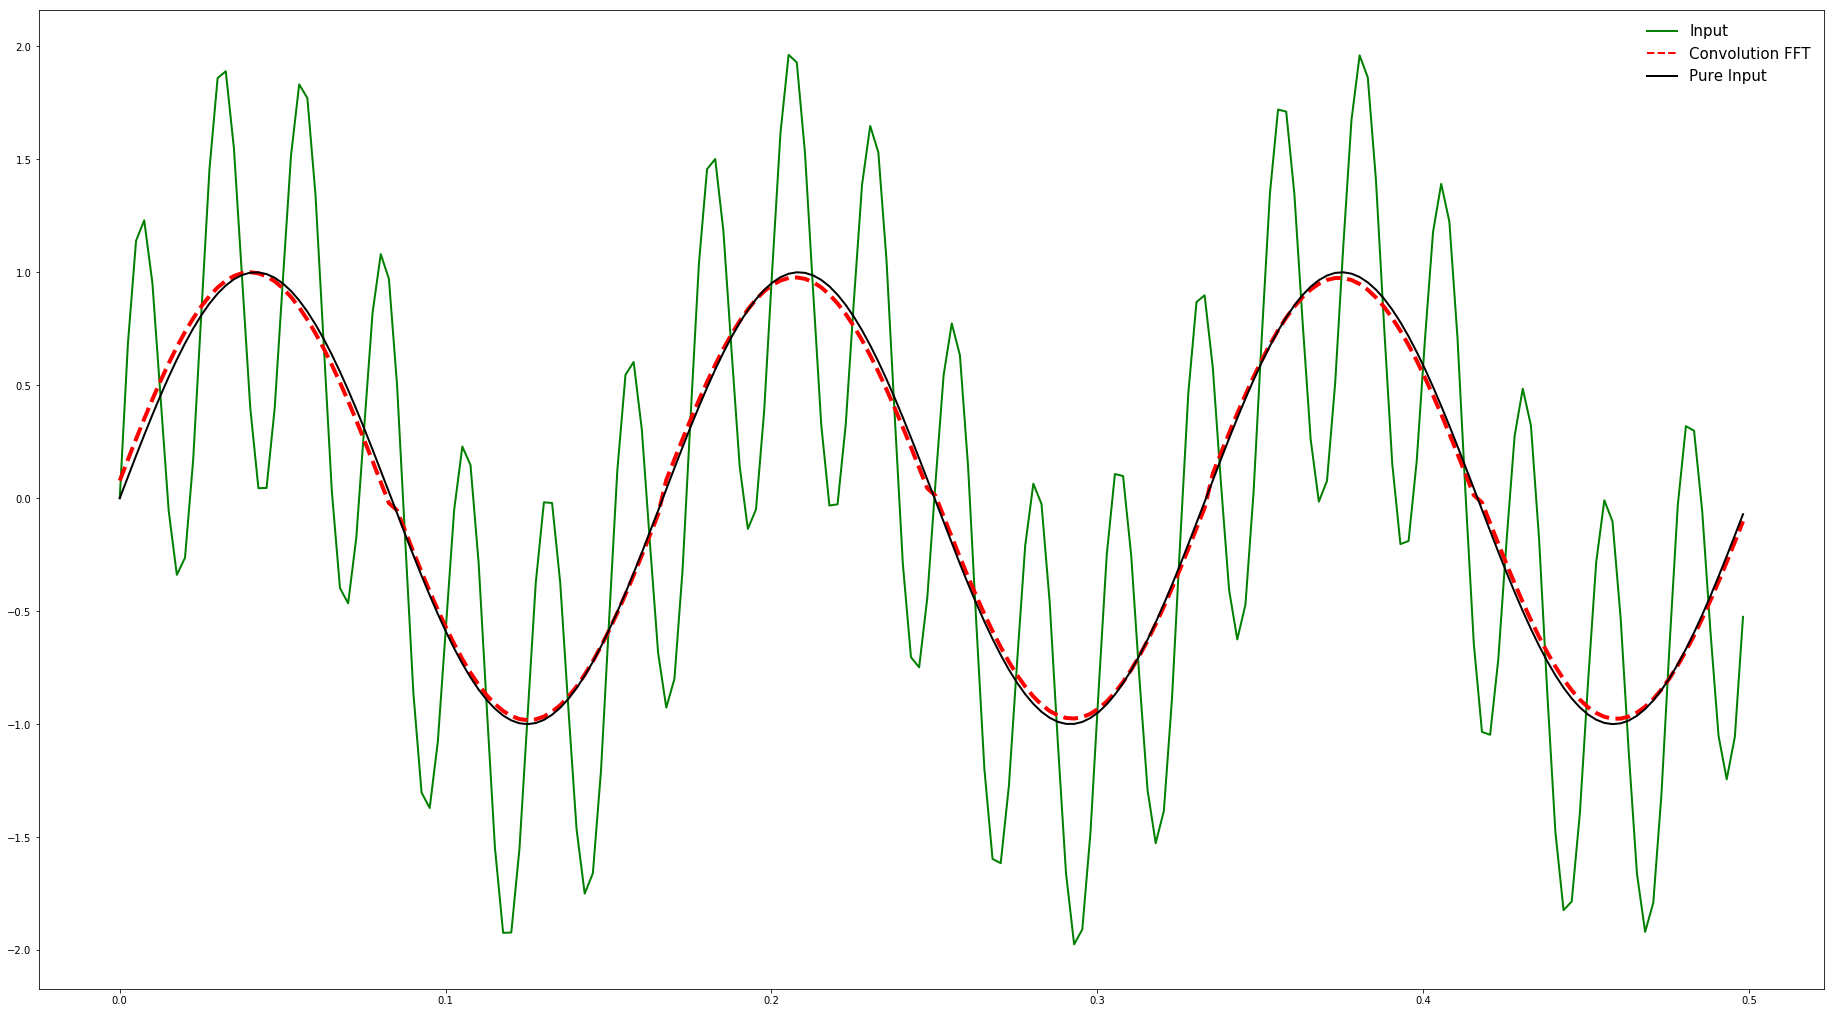

In [10]:
f1=6
f2=40
s=1
#Fs=s #seconds
scale=20
r=max(f1,f2)*scale*s
#z=np.linspace(0,r,int(r/2)+1)
t=np.linspace(0, 2*s, r)
z=np.fft.fftfreq(r)/(2*s)*r
#z=np.fft.fftshift(z)
B=f1*2
t1=np.linspace(0, 2*s, r)
#a=np.sinc(2*B*t)
pad=0
#a[0:pad]=0
#a[-1-pad:-1]=0
#a[-1]=0
b=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)#+2*np.random.rand(int(t.shape[0]))
f=np.sin(2*np.pi*f1*t)
b[0:pad]=0
b[-1-pad:-1]=0
b[-1]=0
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
#bn=normalize(b)
#a=normalize(a)
#c=ss.fftconvolve(a,b, mode='same')*2*s/r
#c=c/max(c)
#c=normalize(c)
#afft=np.fft.rfft(a,norm='ortho')
#afft=normalize(afft)
bfft=np.fft.fft(b, norm='ortho')
#ibfft=np.real(np.fft.ifft(bfft))
#ibfft = normalize(ibfft)
filter_size=int((f1+1)/z[1])
bfftr=np.zeros(bfft.shape[0])
bfftr[:filter_size]=np.real(bfft[:filter_size])
#b_r=np.fft.ifft(bfftr)
#b_r=normalize(b_r)
bfftl=np.zeros(bfft.shape[0])
bfftl[:filter_size]=np.imag(bfft[:filter_size])
bfft_realf=np.ndarray.tolist(np.array(bfftr)+np.array(1j*bfftl))
b_realf=np.fft.ifft(bfft_realf)
b_realf=normalize(b_realf)
#bfft_proc=np.zeros(bfft.shape[0])
#bfft_proc[:filter_size]=bfft[:filter_size]
#b_proc = np.fft.ifft(bfft_proc)
#b_proc=normalize(b_proc)
#bfft=normalize(bfft)
#cfft=np.fft.rfft(c, norm='ortho')
#cfft=normalize(cfft)
index_start=  int(0)
index_stop = int(r/4)
plt.figure(figsize=(32,18))
#plt.plot(t[index_start:index_stop],np.roll(b_proc[index_start:index_stop],17), 'b--',linewidth=3, label='Filter') # sinc
plt.plot(t[index_start:index_stop],b[index_start:index_stop],'g-', linewidth=2, label='Input') # input signal
#plt.plot(t[index_start:index_stop],np.roll(b_r[index_start:index_stop],17),'y-', label='Convolution Sinc' ) # convoluted
plt.plot(t[index_start:index_stop],b_realf[index_start:index_stop],'r--',linewidth=4, label='Convolution FFT' ) # convoluted
plt.plot(t[index_start:index_stop],f[index_start:index_stop], 'k-',linewidth=2, label='Pure Input') # sinc

leg=plt.legend(fontsize=15, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
    


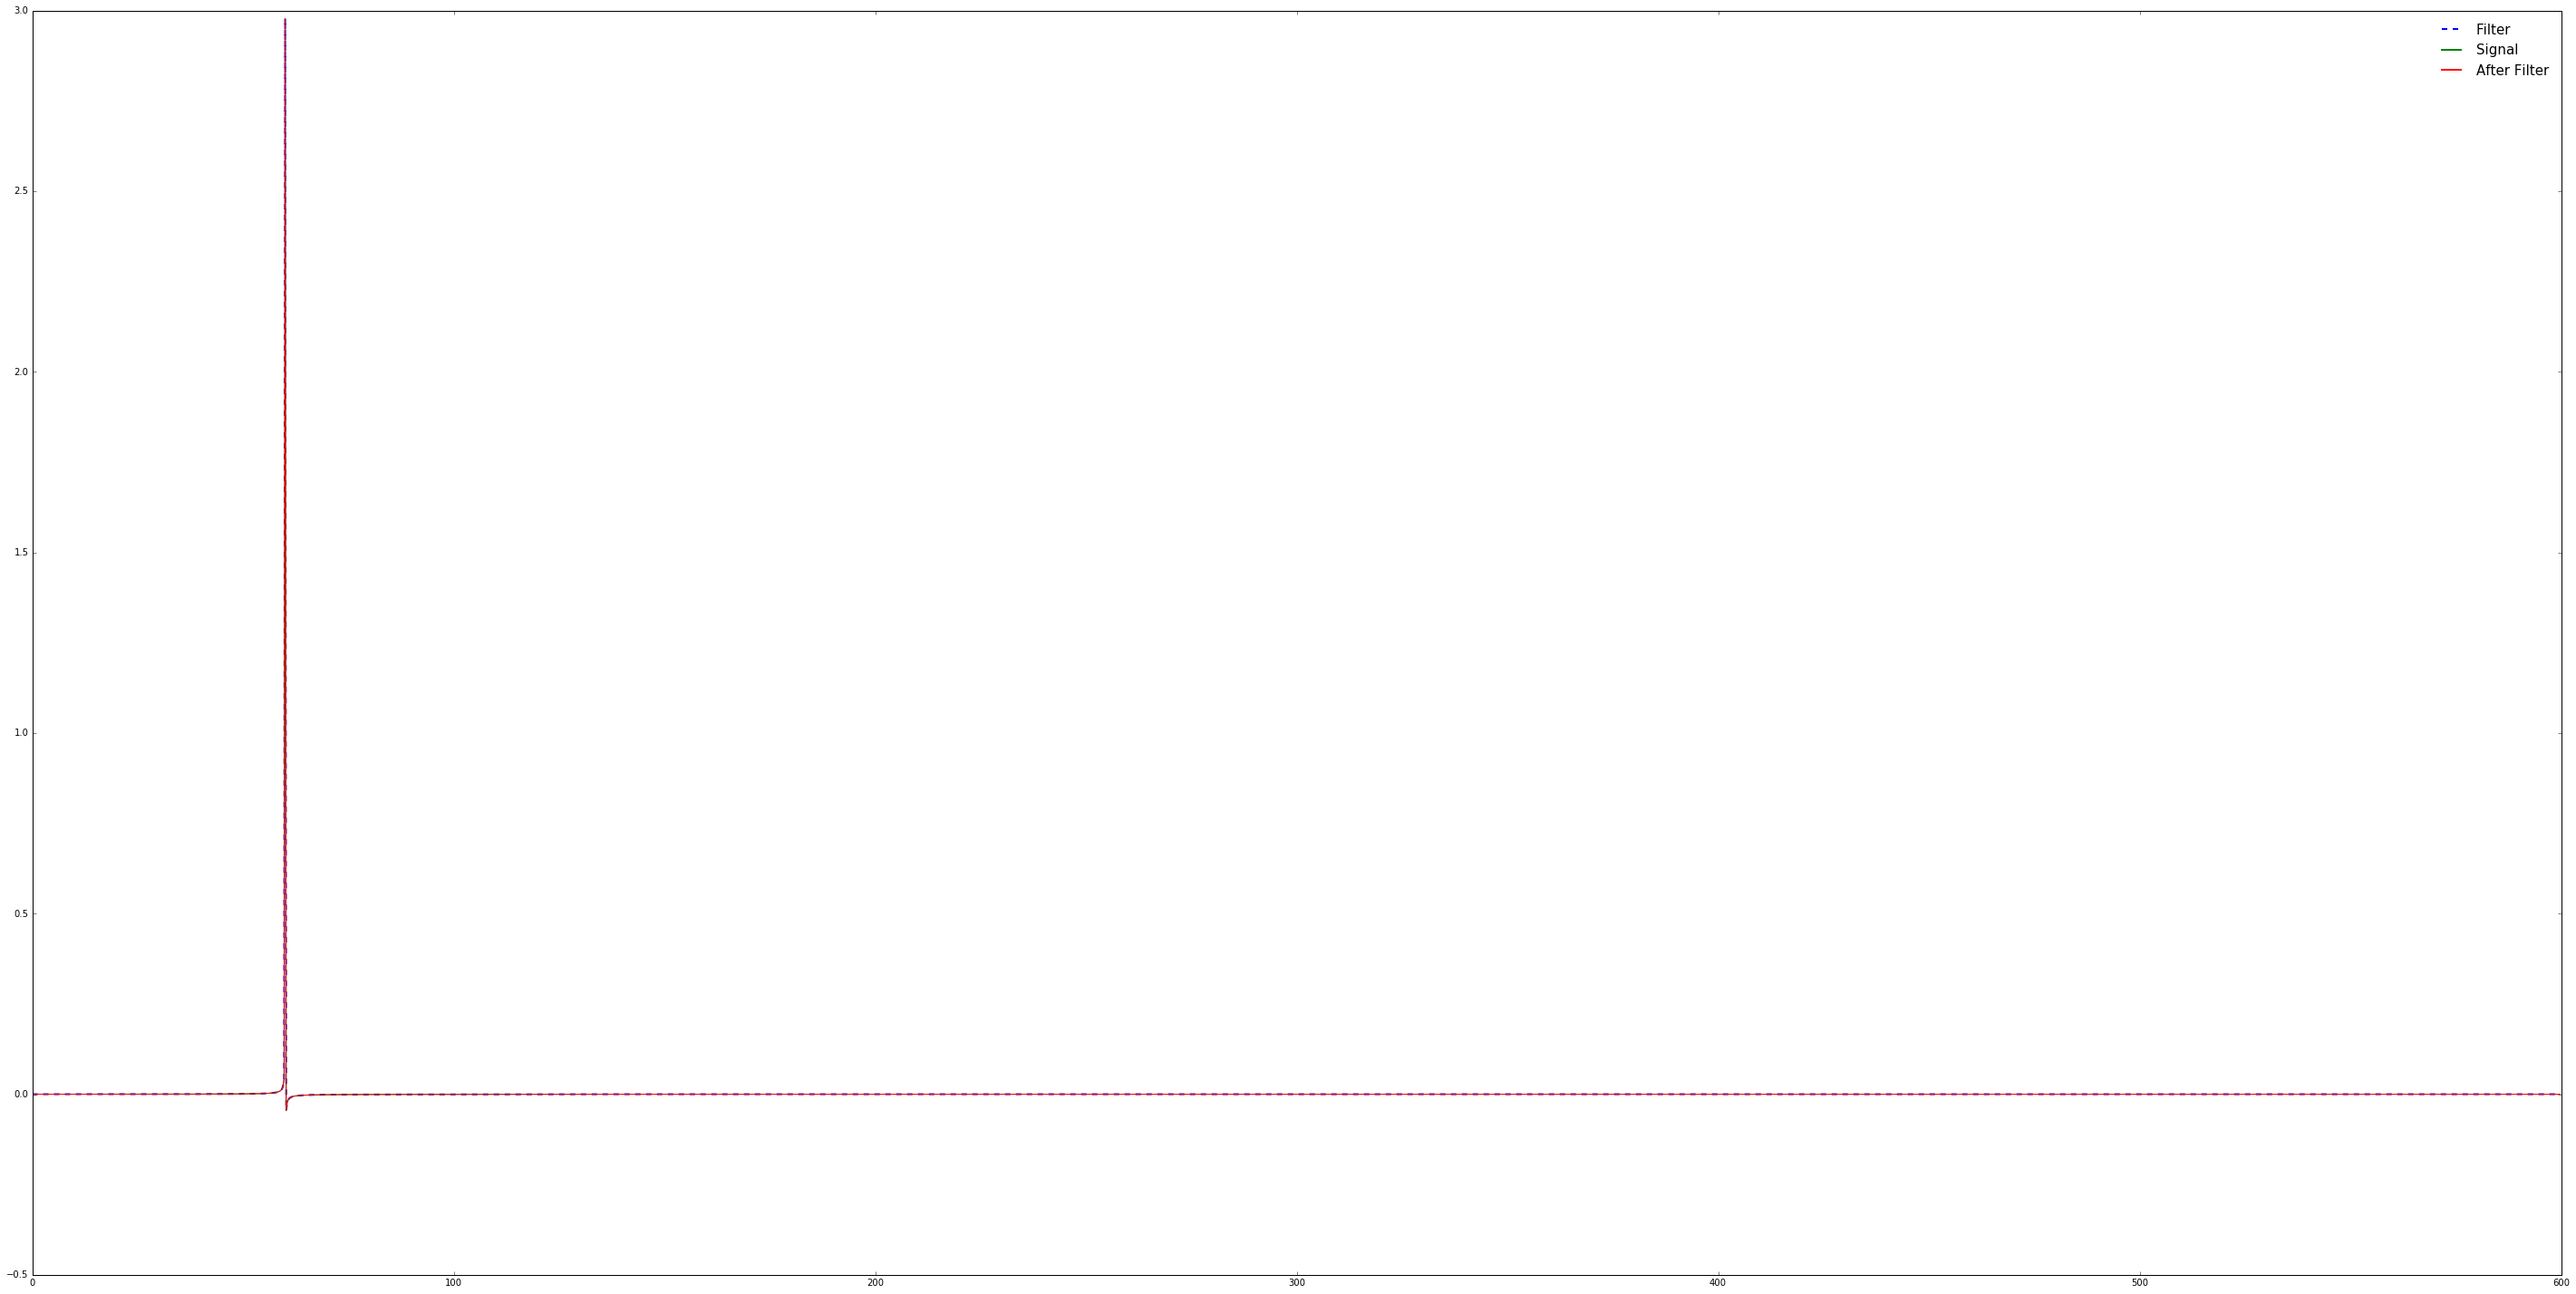

In [761]:
index_start= int(afft.shape[0]*(1-1))
index_stop = int(afft.shape[0]*(1-.7))
plt.figure(figsize=(50,25))
plt.plot(z[index_start:index_stop],np.real(bfft_proc[index_start:index_stop]),'b--', linewidth=2, label='Filter') #sinc
plt.plot(z[index_start:index_stop],np.real(bfft_realf[index_start:index_stop]),'g-', linewidth=1, label='Signal') # signal
plt.plot(z[index_start:index_stop],np.real(bfftr[index_start:index_stop]),'r-', linewidth=1, label='After Filter') # signal
#plt.ylim(ymax=1.1)
#plt.ylim(ymin=-200)
#plt.xlim(xmax=25)
#plt.xlim(xmin=100)
leg=plt.legend(fontsize=15, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

In [ ]:
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm

norm_b = normalize(b) 

In [398]:
max(c)/max(b)

0.45974080003647894

In [399]:
max(b)/max(c)

2.175138686670083

In [407]:
sum(b)*sum(a)/r

0.28560071680653204

In [566]:
cfft=d[0:np.size(bfft)]*bfft
ic=np.fft.ifft(cfft)

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


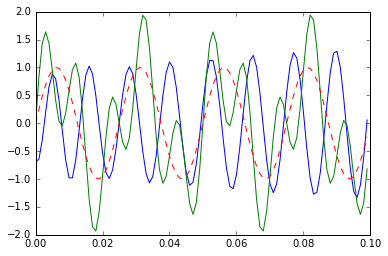

In [578]:
plt.plot(t[0:100],ic[0:100]/max(ic)*2,'-b')
plt.plot(t[0:100],b[0:100],'-g')
plt.plot(t[0:100],np.sin(2*np.pi*f1*t)[0:100],'r--')

In [571]:
base1_fft=np.fft.fft(np.sin(2*np.pi*f1*t))

In [632]:
e=int((f1*2)/z[1])

In [633]:
dfft=np.ones(z.shape[0])
dfft[e:-1]=0
dfft[-1]=0
dfft=dfft/e
di=dfft[0:np.size(bfft)]*bfft
d=np.fft.ifft(di)
d=normalize(d)

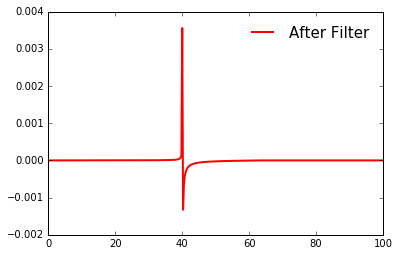

In [582]:
index_start= 0
index_stop = int(afft.shape[0]*(1-.8))
#plt.plot(z[index_start:index_stop],np.real(d[index_start:index_stop]),'b-', linewidth=2, label='Filter') #sinc
#plt.plot(z[index_start:index_stop],base1_fft[index_start:index_stop]/max(base1_fft),'g--', linewidth=2, label='Signal') # signal
plt.plot(z[index_start:index_stop],np.real(cfft[index_start:index_stop]),'r-', linewidth=2, label='After Filter') # signal
#plt.ylim(ymax=1.1)
#plt.ylim(ymin=-200)
#plt.xlim(xmax=25)
#plt.xlim(xmin=100)
leg=plt.legend(fontsize=15, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


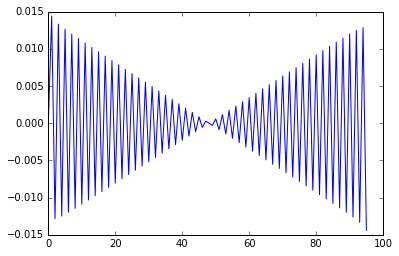

In [786]:

plt.plot(np.fft.ifft(1j*np.imag(bfft[:filter_size])))

In [787]:
asf=[1,2,3]
bsf=[4,5,6]
csf=asf+bsf

In [777]:
csf

[1, 2, 3, 4, 5, 6]